In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product



In [2]:
ds=pd.read_csv('Mall_Customers.csv')
ds.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
ds.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
ds.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
ds.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
corr=ds.corr()
corr

C:\Users\admin\AppData\Local\Temp\ipykernel_6948\2875146422.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=ds.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


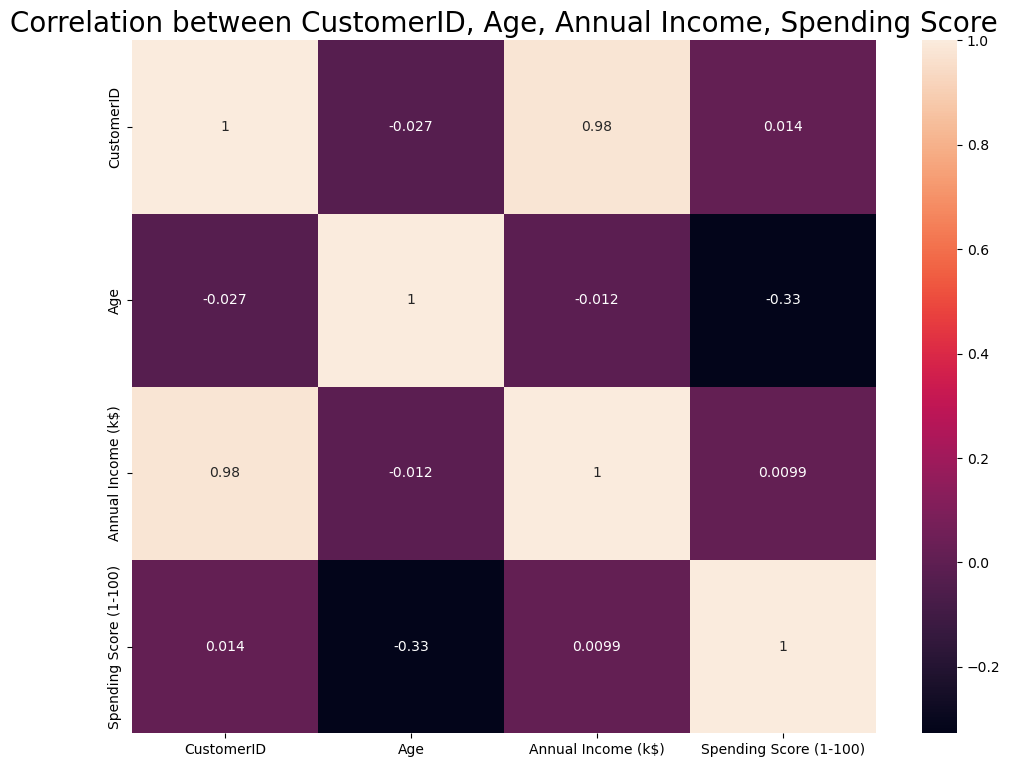

In [7]:
plt.subplots(figsize=(12,9))
sns.heatmap(corr,annot=True)
plt.title('Correlation between CustomerID, Age, Annual Income, Spending Score', fontsize = 20)
plt.show()

In [8]:
ds.drop(['CustomerID'], axis=1,inplace=True)

In [9]:
ds.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [10]:
ds= pd.get_dummies(ds, columns = ['Gender'])
ds.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [11]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(ds)

DBSCAN_clustered = ds.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

In [12]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


In [19]:
#Defining the outliers
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

ax=sns.scatterplot('Annual Income (k$)','Spending Score (1-100)',data=DBSCAN_clustered[
    DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', legend='full', s=45)

ax.set_xlabel('Annual Income (k$)', fontsize = 10)
ax.set_ylabel('Spending Score (1-100)', fontsize = 10)
ax.set_title('How annual income corresponds to the spending rate ', fontsize = 15)

TypeError: scatterplot() got multiple values for argument 'data'

In [20]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

ax=sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', legend='full', s=45)

ax.set_xlabel('Annual Income (k$)', fontsize = 10)
ax.set_ylabel('Spending Score (1-100)', fontsize = 10)
ax.set_title('How annual income corresponds to the spending rate ', fontsize = 15)

TypeError: scatterplot() got multiple values for argument 'data'

In [21]:
pip install fuzzy-c-means

                                              0.0/2.1 MB ? eta -:--:--
     -                                        0.1/2.1 MB 2.0 MB/s eta 0:00:02
     -----                                    0.3/2.1 MB 3.4 MB/s eta 0:00:01
     -----------                              0.6/2.1 MB 4.7 MB/s eta 0:00:01
     ------------------                       1.0/2.1 MB 5.6 MB/s eta 0:00:01
     ---------------------------------------  2.1/2.1 MB 9.5 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 8.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install -U scikit-fuzzy

                                              0.0/994.0 kB ? eta -:--:--
     --                                      71.7/994.0 kB 1.3 MB/s eta 0:00:01
     ----------                             276.5/994.0 kB 2.8 MB/s eta 0:00:01
     ------------------------               634.9/994.0 kB 4.4 MB/s eta 0:00:01
     -------------------------------------  993.3/994.0 kB 5.7 MB/s eta 0:00:01
     -------------------------------------- 994.0/994.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894084 sha256=f9e3eaed81ef2022c0fb9b98ce9fcc6b43d2c1231bcd3fc7aad3ff721587a5f4
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\b1\67\d1\6c29aeb1cd2d36447ad5b0de027580b8894aff702a9b50041e
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [23]:
from fcmeans import FCM

In [25]:
X= ds.to_numpy()
X

array([[ 19,  15,  39,   0,   1],
       [ 21,  15,  81,   0,   1],
       [ 20,  16,   6,   1,   0],
       [ 23,  16,  77,   1,   0],
       [ 31,  17,  40,   1,   0],
       [ 22,  17,  76,   1,   0],
       [ 35,  18,   6,   1,   0],
       [ 23,  18,  94,   1,   0],
       [ 64,  19,   3,   0,   1],
       [ 30,  19,  72,   1,   0],
       [ 67,  19,  14,   0,   1],
       [ 35,  19,  99,   1,   0],
       [ 58,  20,  15,   1,   0],
       [ 24,  20,  77,   1,   0],
       [ 37,  20,  13,   0,   1],
       [ 22,  20,  79,   0,   1],
       [ 35,  21,  35,   1,   0],
       [ 20,  21,  66,   0,   1],
       [ 52,  23,  29,   0,   1],
       [ 35,  23,  98,   1,   0],
       [ 35,  24,  35,   0,   1],
       [ 25,  24,  73,   0,   1],
       [ 46,  25,   5,   1,   0],
       [ 31,  25,  73,   0,   1],
       [ 54,  28,  14,   1,   0],
       [ 29,  28,  82,   0,   1],
       [ 45,  28,  32,   1,   0],
       [ 35,  28,  61,   0,   1],
       [ 40,  29,  31,   1,   0],
       [ 23,  

In [31]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

Text(0.5, 1.0, 'Analysing How Age of the Customers Corresponds to the Spending Rate')

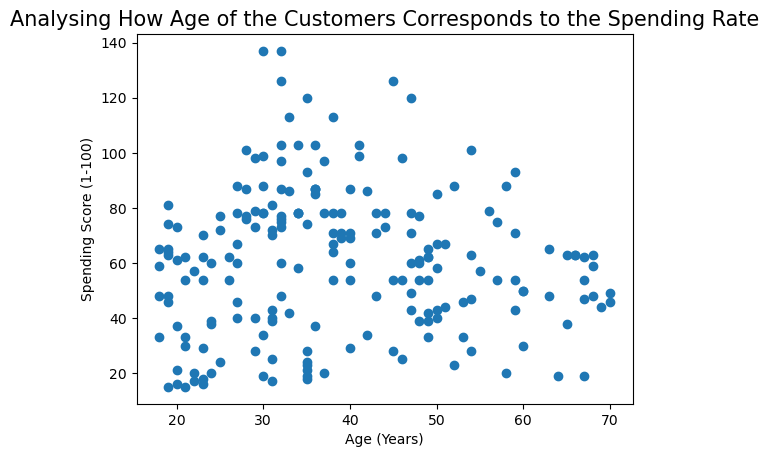

In [53]:
ax=plt.scatter(X[:,0], X[:,1])
plt.xlabel('Age (Years)', fontsize = 10)
plt.ylabel('Spending Score (1-100)', fontsize = 10)
plt.title('Analysing How Age of the Customers Corresponds to the Spending Rate', fontsize = 15)

In [54]:
#outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

In [55]:
fcm_centers

array([[32.959235  , 70.38831229, 68.08069791,  0.56259156,  0.43740844],
       [43.92206429, 54.10650277, 38.63955164,  0.57053529,  0.42946471]])

In [56]:
fcm_labels


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

Text(0.5, 1.0, 'Predicting How Age of the Customers Corresponds to the Spending Rate')

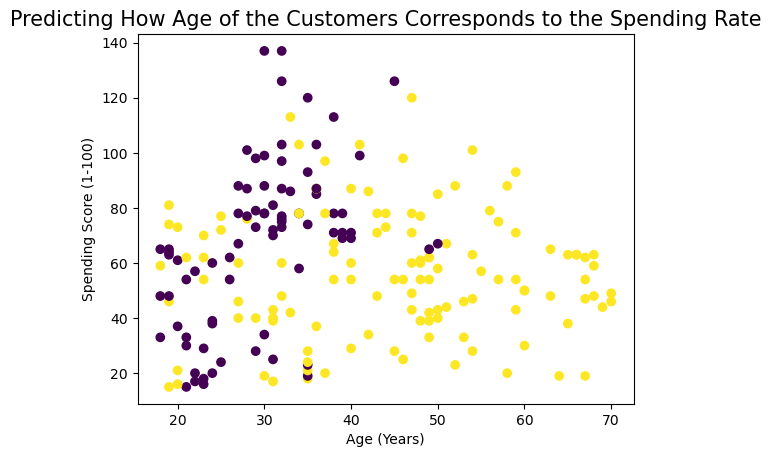

In [59]:
ax=plt.scatter(X[:,0], X[:,1], c=fcm_labels)
plt.xlabel('Age (Years)', fontsize = 10)
plt.ylabel('Spending Score (1-100)', fontsize = 10)
plt.title('Analysing How Age of the Customers Corresponds to the Spending Rate', fontsize = 15)
#ax.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.xlabel('Age (Years)', fontsize = 10)
plt.ylabel('Spending Score (1-100)', fontsize = 10)
plt.title('Predicting How Age of the Customers Corresponds to the Spending Rate', fontsize = 15)
